<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Time-Series-Data" data-toc-modified-id="Time-Series-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Time Series Data</a></span><ul class="toc-item"><li><span><a href="#What-is-Time-Series-Data?" data-toc-modified-id="What-is-Time-Series-Data?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><strong><font color="red">What is Time Series Data?</font></strong></a></span></li><li><span><a href="#So-What?" data-toc-modified-id="So-What?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><strong><font color="orange">So What?</font></strong></a></span></li><li><span><a href="#Now-What?" data-toc-modified-id="Now-What?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><strong><font color="green">Now What?</font></strong></a></span></li></ul></li><li><span><a href="#Acquiring" data-toc-modified-id="Acquiring-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Acquiring</a></span><ul class="toc-item"><li><span><a href="#What-is-a-REST-API?" data-toc-modified-id="What-is-a-REST-API?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><strong><font color="red">What is a REST API?</font></strong></a></span></li><li><span><a href="#So-What?" data-toc-modified-id="So-What?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><strong><font color="orange">So What?</font></strong></a></span></li><li><span><a href="#Now-What?" data-toc-modified-id="Now-What?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><strong><font color="green">Now What?</font></strong></a></span></li><li><span><a href="#Acquire-a-DataFrame-by-Making-an-HTTP-Request" data-toc-modified-id="Acquire-a-DataFrame-by-Making-an-HTTP-Request-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><strong>Acquire a DataFrame by Making an HTTP Request</strong></a></span></li><li><span><a href="#Acquire-a-Time-Series-DataFrame-using-DataReader" data-toc-modified-id="Acquire-a-Time-Series-DataFrame-using-DataReader-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><strong>Acquire a Time Series DataFrame using DataReader</strong></a></span></li></ul></li><li><span><a href="#Preparing" data-toc-modified-id="Preparing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preparing</a></span><ul class="toc-item"><li><span><a href="#What?" data-toc-modified-id="What?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><strong><font color="red">What?</font></strong></a></span></li><li><span><a href="#So-What?" data-toc-modified-id="So-What?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><strong><font color="orange">So What?</font></strong></a></span></li><li><span><a href="#Now-What?" data-toc-modified-id="Now-What?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><strong><font color="green">Now What?</font></strong></a></span><ul class="toc-item"><li><span><a href="#Use-.loc()" data-toc-modified-id="Use-.loc()-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Use .loc()</a></span></li><li><span><a href="#Date-Parts" data-toc-modified-id="Date-Parts-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Date Parts</a></span></li><li><span><a href="#Change-data-types" data-toc-modified-id="Change-data-types-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Change data types</a></span></li><li><span><a href="#Use-.assign()" data-toc-modified-id="Use-.assign()-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Use <code>.assign()</code></a></span></li><li><span><a href="#Use-.diff()" data-toc-modified-id="Use-.diff()-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Use <code>.diff()</code></a></span></li><li><span><a href="#Use-.resample()" data-toc-modified-id="Use-.resample()-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>Use .resample()</a></span></li></ul></li></ul></li></ul></div>

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

from pandas_datareader import data as web

import warnings
warnings.filterwarnings("ignore")

from acquire_walkthrough import get_store_data, german_energy_csv
from prepare_walkthrough import numeric_hists

/usr/local/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Time Series Data

### **<font color=red>What is Time Series Data?</font>**

In Time Series Data, time is your primary axis. With Time Series, your data has a natural temporal ordering and measures how things change over equally-spaced increments of time (the increments are not always equally-spaced increments. [See Heteroskedasticity](http://www.statsmakemecry.com/smmctheblog/confusing-stats-terms-explained-heteroscedasticity-heteroske.html)).

### **<font color=orange>So What?</font>**

We have more and more apps in our lives that use Time Series Data to handle data that measures change over time. From your smart thermostat to autonomous trading algorithms, time series databases are the 'fastest growing category of databases' ([source](https://blog.timescale.com/blog/what-the-heck-is-time-series-data-and-why-do-i-need-a-time-series-database-dcf3b1b18563/)).

### **<font color=green>Now What?</font>**

<a id=’conversion’></a>

Let's start by converting our DataFrame to a DatetimeIndex.

>Importing data from a csv file as DatetimeIndex

`pd.read_csv(df, parse_dates=True, index_col='date').sort_index()`

>Converting data to a DatetimeIndex

`df['date'] = pd.to_datetime(df.date)`

`df = df.set_index('date').sort_index()`

If you have pandas 1.0.3, read [the doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas.DatetimeIndex) on DatetimeIndex.

## Acquiring

**<font color=green>Here we'll look at a couple example methods for acquiring some data we can use to practice working with time series.</font>**

### **<font color=red>What is a REST API?</font>**

Here is more than you need to know to start playing with the Requests library, but it still barely scratches the surface!

**API** stands for Application Programming Interface, and it is a set of rules that allows programs to talk to each other.

**JSON** stands for JavaScript Object Notation and is a text format that is language independent and made up of name/value pairs. (Like a Python dictionary object)

**REST** stands for **RE**presentational **S**tate **T**ransfer, which is an architectural style and approach to communications used in web service development. It can be thought of as the language of the internet.

### **<font color=orange>So What?</font>**

Basically, when you link to a **specific URL, a request**, you are able to get a piece of **data returned, a response**. 

A **RESTful JSON API** uses HTTP requests to **GET (retrieve a response object)**, **PUT (change the state of or update your response object)**, **POST (create the response object)**, and **DELETE (remove a response object)** data. It allows users to connect to, manage, and interact with cloud services.

The `requests` module allows you to send HTTP requests to a REST API using python. The HTTP request to a RESTful JSON API returns a response object with the data in JSON format. You can get a variety of information from this response object using different methods, some of which are explained in the table below in 'Now What.'


**<font color=purple>Parts of a Request:</font>**

**The Endpoint or Route**

**root-endpoint** is the starting point of the API you are requesting from.

>`https://api.github.com`

**path** directs your request and determines the resource you receive as a response to your GET request. The example below gets a list of repositories by a certain user, in this case `faithkane3`. The API documentation lets you know what paths are available to you.

>`https://api.github.com/users/faithkane3/repos`

**query parameters** allow you to modify your request with key-value pairs. They begin with a ? and are separated with &.

>`https://api.github.com/users/faithkane3/repos?sort=pushed`

![image.jpg](https://res.cloudinary.com/indysigner/image/fetch/f_auto,q_auto/w_2000/https://cloud.netlifyusercontent.com/assets/344dbf88-fdf9-42bb-adb4-46f01eedd629/c119c0b2-4ded-42d0-90f0-496b14bf5e1f/understanding-api-doc-github-repo-opt.png)
[source](https://www.smashingmagazine.com/2018/01/understanding-using-rest-api/)

**The Method or Type of Request** CRUD (Create, Read, Update, Delete)

**GET** - A GET request performs a READ operation. A GET request to a server sends you back the data you requested.

**POST** - A POST request performs a CREATE operation. 

**PUT** - A PUT request performs an UPDATE operation.

**PATCH** - A PATCH request performs an UPDATE operation.

**DELETE** - A DELETE request performs a DELETE operation


### **<font color=green>Now What?</font>**

**Properties and Methods of response objects (not an exhaustive list)**

| Property/Method | Description |
| :--- | ----------- |
| .content | Returns the response in bytes |
| .json() | Returns a JSON object of the result if result in JSON format, otherwise raises an error |
|.ok|Returns True if status_code is less than 200, otherwise False|
|.request|Returns the request object that requested this response|
|.status_code|Returns a number that indicates the status|
|.text|Returns the content of the response, in unicode|
|.url|Returns the URL of the response|

### **Acquire a DataFrame by Making an HTTP Request**

**<font color=purple>What if I wanted to get a list of repositories from a Github user?</font>**

In [4]:
import requests

url = 'https://api.github.com/users/faithkane3/repos?sort=pushed'
response = requests.get(url)
response

<Response [200]>

`.ok` returns a boolean communicating if the request was successful.

In [5]:
response.ok

True

`.status_code` returns the HTTP response status code.

In [6]:
response.status_code

200

**<font color=purple>HTTP Status Codes and Error Messages</font>**

>200+ means the request has succeeded.

>300+ means the request is redirected to another URL

>400+ means an error that originates from the client has occurred

>500+ means an error that originates from the server has occurred

`.text` returns the raw response text

In [7]:
# I'm limiting the text string to 500 characters bc it's one long string!

print(type(response.text))
response.text[:500]

<class 'str'>


'[{"id":213936295,"node_id":"MDEwOlJlcG9zaXRvcnkyMTM5MzYyOTU=","name":"ds-methodologies-exercises","full_name":"faithkane3/ds-methodologies-exercises","private":false,"owner":{"login":"faithkane3","id":43799876,"node_id":"MDQ6VXNlcjQzNzk5ODc2","avatar_url":"https://avatars0.githubusercontent.com/u/43799876?v=4","gravatar_id":"","url":"https://api.github.com/users/faithkane3","html_url":"https://github.com/faithkane3","followers_url":"https://api.github.com/users/faithkane3/followers","following_u'

In [8]:
# Use the `.json()` method on our response and access a list of dictionaries for all my Github repos
# The response will not always be a list of dictionaries; it might be a dictionary.
# In this case, there are 23 dictionaries in my list, 'data'

data = response.json()
print(type(data))
len(data)

<class 'list'>


23

In [9]:
# Access the keys of the first dictionary to understand the format of each dictionary in my list

data[0].keys()

dict_keys(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url', 'description', 'fork', 'url', 'forks_url', 'keys_url', 'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url', 'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url', 'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url', 'languages_url', 'stargazers_url', 'contributors_url', 'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url', 'comments_url', 'issue_comment_url', 'contents_url', 'compare_url', 'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url', 'milestones_url', 'notifications_url', 'labels_url', 'releases_url', 'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url', 'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size', 'stargazers_count', 'watchers_count', 'language', 'has_issues', 'has_projects', 'has_downloads', 'has_wiki', 'has_pages', 'forks_count', 'mirror_url', 'archived', 'disabled', 'open_issues_count', 'lic

In [10]:
# get a list of the names of all of my repos on Github

repos = []
for i in range(len(data)):
    repos.append(data[i]['name'])
print(repos)

['ds-methodologies-exercises', 'faithkane3.github.io', 'zillow_project', 'codeup_review', 'makeovermonday', 'python-exercises', 'pandas_practice', 'side_projects', 'flask_intro', 'intro-to-deep-learning-with-keras', 'natural_language_processing', 'python_fun', 'git_warmup', 'bayes-methodologies-exercises', 'statistics-exercises', 'resources', 'numpy-100', 'karma_atm', 'checkbook_application', 'database-exercises', 'sql_practice', '101-exercises', 'python_101_ds']


**OR I could just make it a pandas DataFrame!**

In [11]:
repos_df = pd.DataFrame(data)
repos_df.head(2)

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,forks_count,mirror_url,archived,disabled,open_issues_count,license,forks,open_issues,watchers,default_branch
0,213936295,MDEwOlJlcG9zaXRvcnkyMTM5MzYyOTU=,ds-methodologies-exercises,faithkane3/ds-methodologies-exercises,False,"{'login': 'faithkane3', 'id': 43799876, 'node_...",https://github.com/faithkane3/ds-methodologies...,None,False,https://api.github.com/repos/faithkane3/ds-met...,...,0,None,False,False,0,None,0,0,0,master
1,250357165,MDEwOlJlcG9zaXRvcnkyNTAzNTcxNjU=,faithkane3.github.io,faithkane3/faithkane3.github.io,False,"{'login': 'faithkane3', 'id': 43799876, 'node_...",https://github.com/faithkane3/faithkane3.githu...,None,False,https://api.github.com/repos/faithkane3/faithk...,...,0,None,False,False,0,None,0,0,1,master


In [12]:
repos_df.name.tolist()

['ds-methodologies-exercises',
 'faithkane3.github.io',
 'zillow_project',
 'codeup_review',
 'makeovermonday',
 'python-exercises',
 'pandas_practice',
 'side_projects',
 'flask_intro',
 'intro-to-deep-learning-with-keras',
 'natural_language_processing',
 'python_fun',
 'git_warmup',
 'bayes-methodologies-exercises',
 'statistics-exercises',
 'resources',
 'numpy-100',
 'karma_atm',
 'checkbook_application',
 'database-exercises',
 'sql_practice',
 '101-exercises',
 'python_101_ds']

**How about a list of urls for my repos? Handy for scraping repos!**

In [13]:
repos_df.html_url.tolist()

['https://github.com/faithkane3/ds-methodologies-exercises',
 'https://github.com/faithkane3/faithkane3.github.io',
 'https://github.com/faithkane3/zillow_project',
 'https://github.com/faithkane3/codeup_review',
 'https://github.com/faithkane3/makeovermonday',
 'https://github.com/faithkane3/python-exercises',
 'https://github.com/faithkane3/pandas_practice',
 'https://github.com/faithkane3/side_projects',
 'https://github.com/faithkane3/flask_intro',
 'https://github.com/faithkane3/intro-to-deep-learning-with-keras',
 'https://github.com/faithkane3/natural_language_processing',
 'https://github.com/faithkane3/python_fun',
 'https://github.com/faithkane3/git_warmup',
 'https://github.com/faithkane3/bayes-methodologies-exercises',
 'https://github.com/faithkane3/statistics-exercises',
 'https://github.com/faithkane3/resources',
 'https://github.com/faithkane3/numpy-100',
 'https://github.com/faithkane3/karma_atm',
 'https://github.com/faithkane3/checkbook_application',
 'https://github

### **Acquire a Time Series DataFrame using DataReader**

pandas_datareader is an API that allows you to access stock price and volume. This can be some cool time series data to play around with.

`web.DataReader(name= , data_source= , start= , end= )`

In [14]:
df = web.DataReader(name='MSFT', data_source='yahoo', start = '2015-01-01', end='2020-12-31')

In [15]:
df = df.sort_index()

In [16]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,47.419998,46.540001,46.660000,46.759998,27913900.0,41.864841
2015-01-05,46.730000,46.250000,46.369999,46.330002,39673900.0,41.479866
2015-01-06,46.750000,45.540001,46.380001,45.650002,36447900.0,40.871037
2015-01-07,46.459999,45.490002,45.980000,46.230000,29114100.0,41.390320
2015-01-08,47.750000,46.720001,46.750000,47.590000,29645200.0,42.607944


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1349 entries, 2015-01-02 to 2020-05-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1349 non-null   float64
 1   Low        1349 non-null   float64
 2   Open       1349 non-null   float64
 3   Close      1349 non-null   float64
 4   Volume     1349 non-null   float64
 5   Adj Close  1349 non-null   float64
dtypes: float64(6)
memory usage: 73.8 KB


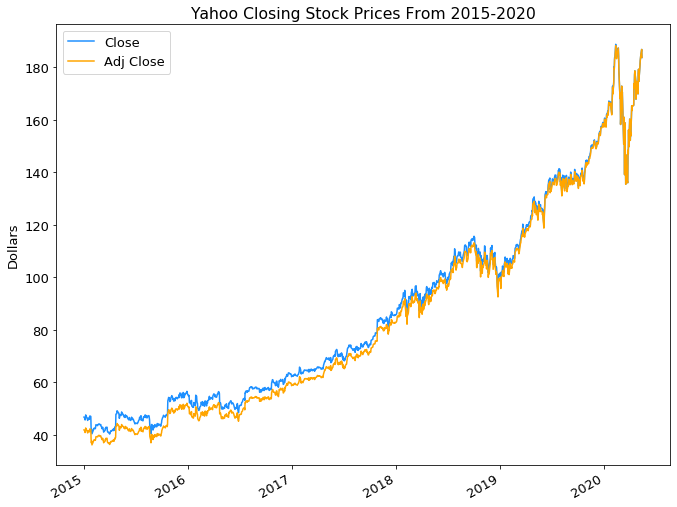

In [18]:
df.Close.plot(color='dodgerblue')
df['Adj Close'].plot(color='orange')

plt.title('Yahoo Closing Stock Prices From 2015-2020')
plt.xlabel('')
plt.ylabel('Dollars')
plt.legend()
plt.show()

In [19]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1349.000000,1349.000000,1349.000000,1349.000000,1.349000e+03,1349.000000
mean,87.635797,85.997650,86.841468,86.865997,3.034041e+07,84.084800
std,38.311101,37.372272,37.873262,37.870572,1.526129e+07,39.109545
min,40.740002,39.720001,40.340000,40.290001,7.425600e+06,36.170650
25%,54.660000,53.689999,54.180000,54.189999,2.104330e+07,49.912457
50%,74.309998,73.449997,73.800003,73.980003,2.643530e+07,70.984238
75%,111.449997,109.360001,110.739998,110.830002,3.444170e+07,108.615486
max,190.699997,186.470001,190.649994,188.699997,1.691640e+08,188.185989


**When you have time, this tutorial plays with DataReader [more](https://www.youtube.com/watch?v=UFuo7EHI8zc&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS&index=10).**

## Preparing


### **<font color=red>What?</font>**

I will address specifically preparing data with a DatetimeIndex. Click [here](#conversion) to jump back up to how to convert your DataFrame or import your csv file to have a DatetimeIndex.

### **<font color=orange>So What?</font>**



### **<font color=green>Now What?</font>**

<div class="alert alert-block alert-danger"> If you have upgraded to pandas 1.0.3, you can check by running this in a cell `pd.__version__`, </div>

[this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas.DatetimeIndex) might be helpful.

>**<font color=purple>I will use my function to get some DatetimeIndex data to work with.</font>**

In [20]:
df = get_store_data()
df.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


#### Use .loc()

You can use `.loc[]` to access a row or column or a group of rows or colums by

#### Date Parts

>**<font color=purple>A DatetimeIndex allows me to quickly access and isolate other information about a particular datetime like the month, the day of the week, or the year. There are many more attributes of a timestamp object that you can access [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas.DatetimeIndex).</font>**

In [21]:
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday'] = df.index.day_name()

df.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,year,month,weekday
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,Tuesday
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,2013,1,Tuesday


#### Change data types

>`df = df.astype({'col': dtype, 'col': dtype})`

In [22]:
# I want to check out the distributions of the numeric data; I will change some dtypes here to do that.

df = (df.astype({'sale_id': object, 'store_id': object, 
                     'store_zipcode': object, 'item_id': object, 
                     'item_upc12': object, 'item_upc14': object, 
                     'month': 'category', 'weekday': 'category',
                        'year': 'category'}))

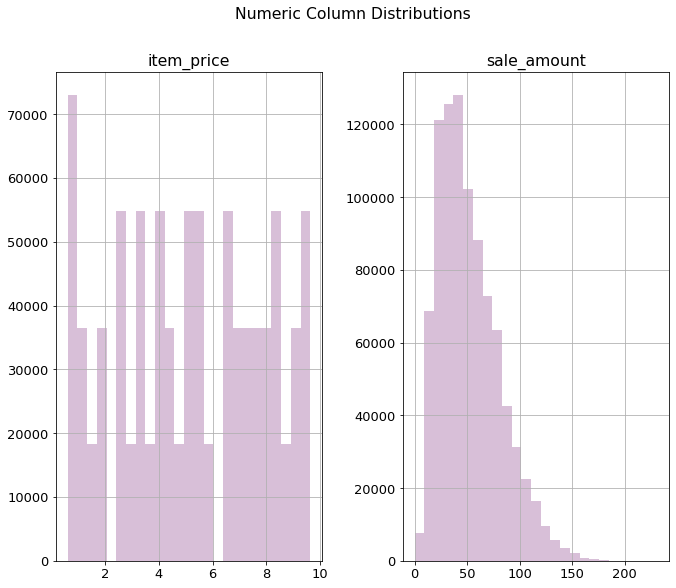

In [23]:
numeric_hists(df, bins=25)

####  Use `.assign()` 
- Create New Columns from existing columns in your df

>`df = df.assign(new_col_name = your calculation)`

In [24]:
# Create a new calculated column from two existing columns in my DataFrame

df = df.assign(sales_total = df.sale_amount * df.item_price)
df.head(1)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,year,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,Tuesday,10.92


#### Use `.diff()`

>`df.diff(periods=1, axis=0)`  {default}

- Difference in df element with df element in previous rows
>`df.diff()`

- Difference in df element with df element in previous columns
>`df.diff(axis=1)`

In [25]:
# Create a new calculated column with the value of the difference between current sales and previous day sales

df = df.assign(sales_diff = df.sales_total.diff())
df.head(3)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,year,month,weekday,sales_total,sales_diff
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,Tuesday,10.92,NaN
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,2013,1,Tuesday,218.40,207.48
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,2013,1,Tuesday,125.55,-92.85


#### Use .resample()

In [26]:
# Here I resample my df by month and sum the overall sales_total column for each month

df.resample('M').sales_total.sum().head()

sale_date
2013-01-31 00:00:00+00:00    2447368.20
2013-02-28 00:00:00+00:00    2469765.97
2013-03-31 00:00:00+00:00    3319815.58
2013-04-30 00:00:00+00:00    3666901.23
2013-05-31 00:00:00+00:00    4102278.40
Freq: M, Name: sales_total, dtype: float64

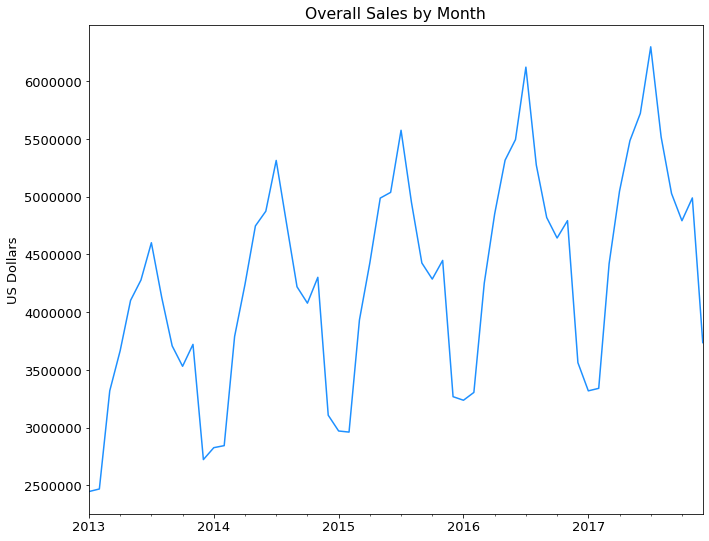

In [27]:
# How about a quick look at that resample...
# It looks like the overall monthly sales for all the combined stores is trending upward

df.resample('M').sales_total.sum().plot(color='dodgerblue')

plt.title('Overall Sales by Month')
plt.xlabel('')
plt.ylabel('US Dollars')
plt.show()